In [1]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import constants
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [4]:
df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df['Gender'].value_counts()


Male      5000
Female    5000
Name: Gender, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Weight'>

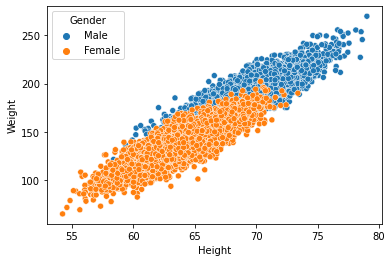

In [6]:
sns.scatterplot('Height','Weight',data=df,hue='Gender')

In [7]:
df.Gender = df.Gender.map({"Male" : 0, "Female" : 1})
df.sample(n=10)

,Gender,Height,Weight
1464,0,70.959489,212.230145
169,0,69.868970,201.837043
4322,0,72.993297,190.904148
4740,0,68.284163,185.537597
4764,0,68.919881,189.918571
2079,0,68.698175,184.216698
4616,0,65.531800,177.618224
381,0,67.097586,193.955107
8900,1,61.475904,142.518796
6727,1,62.646352,122.336024


In [15]:
X = df[ ["Gender", "Height"] ]
y = df[ ["Weight"] ]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [20]:
lin_reg.score(X_test, y_test)

0.9039548051292363

In [21]:
np.round(lin_reg.predict([[0, 180]])[0][0],1)

851.2

In [22]:
joblib_file = "WeightPredictionLinRegModel.joblib"
joblib.dump(lin_reg, joblib_file)

['WeightPredictionLinRegModel.joblib']